In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
MAX_BATCH_SIZE = 9
ORG_NAME = "PancakeSwap"
SPLITS_FREQ = "3d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-06-27"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-06-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072490
2021-07-01,0.288288,0.165165,0.099099,0.049550,0.033033,0.004955,0.288288,0.272811,0.267201,0.267201,...,0.280781,0.280781,0.280781,0.606771,0.710784,0.710784,0.710784,0.710784,0.710784,0.138875
2021-07-04,0.195312,0.179688,0.107812,0.053906,0.035938,0.005391,0.193798,0.275591,0.267231,0.267231,...,0.315885,0.315885,0.315885,0.611333,0.781111,0.781111,0.781111,0.781111,0.781111,0.140829
2021-07-07,0.247525,0.396040,0.259406,0.129703,0.086469,0.012970,0.247525,0.673261,0.692672,0.692672,...,0.985644,0.985644,0.985644,0.691333,0.856897,0.881034,0.881034,0.881034,0.881034,0.137874
2021-07-10,0.080292,0.133820,0.226277,0.189781,0.142092,0.021314,0.080292,0.150905,0.333026,0.443603,...,0.874029,0.992092,0.992092,0.339761,0.375616,0.462549,0.562892,0.571730,0.571730,0.159668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,0.513793,0.402299,0.271034,0.172759,0.115172,0.017276,0.513793,0.677469,0.711316,0.776266,...,1.000000,1.000000,1.000000,0.589933,0.968074,0.899708,0.899708,0.899708,0.899708,0.188610
2023-07-09,0.065574,0.273224,0.367213,0.219672,0.146448,0.021967,0.065574,0.343450,0.555130,0.617423,...,1.000000,1.000000,1.000000,0.562500,0.380808,0.521717,0.521717,0.521717,0.521717,0.137553
2023-07-12,0.019231,0.262821,0.369231,0.219231,0.146154,0.021923,0.019231,0.332979,0.558792,0.612818,...,1.000000,1.000000,1.000000,1.000000,0.377381,0.516667,0.516667,0.516667,0.516667,0.134720


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-06-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.072867
2021-07-01,1.0,0.447447,0.277477,0.138739,0.092492,0.013874,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.858108,0.988739,1.000000,1.000000,1.0,1.0,0.140750
2021-07-04,1.0,0.418605,0.262016,0.131008,0.087339,0.013101,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.898837,0.987209,1.000000,1.000000,1.0,1.0,0.142407
2021-07-07,1.0,0.425743,0.265347,0.132673,0.088449,0.013267,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.890594,0.988614,1.000000,1.000000,1.0,1.0,0.138934
2021-07-10,1.0,0.549878,0.378102,0.211679,0.143066,0.021460,1.0,1.0,1.0,1.0,...,0.997456,1.0,1.0,0.730452,0.932231,0.972819,0.997456,1.0,1.0,0.151780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,1.0,0.545977,0.344828,0.172759,0.115172,0.017276,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.702931,0.979483,0.999425,1.000000,1.0,1.0,0.174285
2023-07-09,1.0,0.628415,0.439344,0.219672,0.146448,0.021967,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.641257,0.923770,1.000000,1.000000,1.0,1.0,0.140059
2023-07-12,1.0,0.628205,0.438462,0.219231,0.146154,0.021923,1.0,1.0,1.0,1.0,...,1.000000,1.0,1.0,0.641667,0.925000,1.000000,1.000000,1.0,1.0,0.136209


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-06-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072490,openpop
2021-07-01,0.288288,0.165165,0.099099,0.049550,0.033033,0.004955,0.288288,0.272811,0.267201,0.267201,...,0.280781,0.280781,0.606771,0.710784,0.710784,0.710784,0.710784,0.710784,0.138875,openpop
2021-07-04,0.195312,0.179688,0.107812,0.053906,0.035938,0.005391,0.193798,0.275591,0.267231,0.267231,...,0.315885,0.315885,0.611333,0.781111,0.781111,0.781111,0.781111,0.781111,0.140829,openpop
2021-07-07,0.247525,0.396040,0.259406,0.129703,0.086469,0.012970,0.247525,0.673261,0.692672,0.692672,...,0.985644,0.985644,0.691333,0.856897,0.881034,0.881034,0.881034,0.881034,0.137874,openpop
2021-07-10,0.080292,0.133820,0.226277,0.189781,0.142092,0.021314,0.080292,0.150905,0.333026,0.443603,...,0.992092,0.992092,0.339761,0.375616,0.462549,0.562892,0.571730,0.571730,0.159668,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,0.513793,0.402299,0.271034,0.172759,0.115172,0.017276,0.513793,0.677469,0.711316,0.776266,...,1.000000,1.000000,0.589933,0.968074,0.899708,0.899708,0.899708,0.899708,0.188610,openpop
2023-07-09,0.065574,0.273224,0.367213,0.219672,0.146448,0.021967,0.065574,0.343450,0.555130,0.617423,...,1.000000,1.000000,0.562500,0.380808,0.521717,0.521717,0.521717,0.521717,0.137553,openpop
2023-07-12,0.019231,0.262821,0.369231,0.219231,0.146154,0.021923,0.019231,0.332979,0.558792,0.612818,...,1.000000,1.000000,1.000000,0.377381,0.516667,0.516667,0.516667,0.516667,0.134720,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-06-03,15.0,90d,2023-06-03,0.345764,0.307207,42.0,13.0,39.663043,0.065217,0.057971,...,0.183405,0.187348,0.226039,0.236201,0.264894,0.323273,0.193796,itemknn,test,NaN
2023-06-06,15.0,7d,2023-06-06,0.012336,0.075304,50.0,34.0,46.072727,0.109091,0.078788,...,0.546296,0.450860,0.415023,0.430329,0.435431,0.435431,0.172092,itemknn,test,NaN
2023-06-09,2.0,14d,2023-06-09,0.007181,0.085394,60.0,30.0,55.629630,0.092593,0.092593,...,0.182143,0.264782,0.360169,0.521032,0.574306,0.614484,0.177781,itemknn,test,NaN
2023-06-12,15.0,7d,2023-06-12,0.003206,0.043981,48.0,29.0,42.851852,0.222222,0.148148,...,0.319963,0.364560,0.385592,0.460440,0.477534,0.477534,0.151997,itemknn,test,NaN
2023-06-15,10.0,7d,2023-06-15,0.003882,0.077411,91.0,50.0,88.396825,0.650794,0.243386,...,0.914332,0.898880,0.905526,0.898184,0.884883,0.906197,0.216178,itemknn,test,NaN
2023-06-18,9.0,7d,2023-06-18,0.006359,0.072598,86.0,47.0,80.833333,0.041667,0.027778,...,0.148810,0.196429,0.218254,0.250000,0.313492,0.345238,0.189919,itemknn,test,NaN
2023-06-21,1.0,21d,2023-06-21,0.034887,0.158381,126.0,37.0,121.278846,0.028846,0.022436,...,0.444444,0.408333,0.380357,0.380357,0.380357,0.343943,0.306211,itemknn,test,NaN
2023-06-24,15.0,60d,2023-06-24,0.152985,0.443528,75.0,34.0,73.506803,0.302721,0.247166,...,0.584849,0.857828,0.844436,0.837915,0.840162,0.842258,0.469740,itemknn,test,NaN
2023-06-27,1.0,14d,2023-06-27,0.022218,0.092583,57.0,41.0,55.295082,0.098361,0.065574,...,0.544444,0.502083,0.498148,0.542593,0.542593,0.542593,0.183636,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-06-03,15.0,90d,2023-06-03,0.345764,0.307207,42.0,13.0,39.663043,0.065217,0.057971,...,0.183405,0.187348,0.226039,0.236201,0.264894,0.323273,0.193796,itemknn,test,NaN
2023-06-06,15.0,7d,2023-06-06,0.012336,0.075304,50.0,34.0,46.072727,0.109091,0.078788,...,0.546296,0.450860,0.415023,0.430329,0.435431,0.435431,0.172092,itemknn,test,NaN
2023-06-09,2.0,14d,2023-06-09,0.007181,0.085394,60.0,30.0,55.629630,0.092593,0.092593,...,0.182143,0.264782,0.360169,0.521032,0.574306,0.614484,0.177781,itemknn,test,NaN
2023-06-12,15.0,7d,2023-06-12,0.003206,0.043981,48.0,29.0,42.851852,0.222222,0.148148,...,0.319963,0.364560,0.385592,0.460440,0.477534,0.477534,0.151997,itemknn,test,NaN
2023-06-15,10.0,7d,2023-06-15,0.003882,0.077411,91.0,50.0,88.396825,0.650794,0.243386,...,0.914332,0.898880,0.905526,0.898184,0.884883,0.906197,0.216178,itemknn,test,NaN
2023-06-18,9.0,7d,2023-06-18,0.006359,0.072598,86.0,47.0,80.833333,0.041667,0.027778,...,0.148810,0.196429,0.218254,0.250000,0.313492,0.345238,0.189919,itemknn,test,NaN
2023-06-21,1.0,21d,2023-06-21,0.034887,0.158381,126.0,37.0,121.278846,0.028846,0.022436,...,0.444444,0.408333,0.380357,0.380357,0.380357,0.343943,0.306211,itemknn,test,NaN
2023-06-24,15.0,60d,2023-06-24,0.152985,0.443528,75.0,34.0,73.506803,0.302721,0.247166,...,0.584849,0.857828,0.844436,0.837915,0.840162,0.842258,0.469740,itemknn,test,NaN
2023-06-27,1.0,14d,2023-06-27,0.022218,0.092583,57.0,41.0,55.295082,0.098361,0.065574,...,0.544444,0.502083,0.498148,0.542593,0.542593,0.542593,0.183636,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

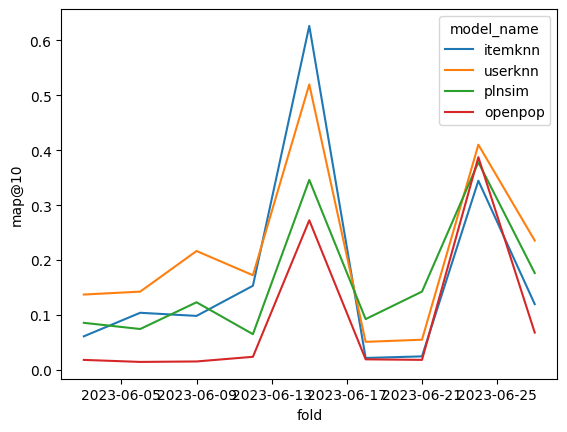

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-05-31,15,90d,2023-05-31,0.349556,0.506341,64,22,61.612403,0.333333,0.124031,0.098450,0.075581,...,0.477245,0.503561,1.000000,0.957752,0.917951,0.911237,0.882669,0.890042,0.895464,0.379581
2023-06-03,15,7d,2023-06-03,0.003854,0.070936,42,28,40.413043,0.152174,0.130435,0.121739,0.136957,...,0.372930,0.545963,1.000000,0.177551,0.226905,0.306429,0.438571,0.438571,0.438571,0.164054
2023-06-06,2,14d,2023-06-06,0.006915,0.102869,50,34,46.447761,0.149254,0.064677,0.059701,0.064179,...,0.235223,0.295185,1.000000,0.509921,0.561508,0.472314,0.432242,0.441171,0.441171,0.179236
2023-06-09,15,7d,2023-06-09,0.004129,0.035556,60,37,52.423077,0.192308,0.192308,0.200000,0.200000,...,0.351450,0.383745,1.000000,0.182143,0.325728,0.478836,0.620862,0.677324,0.728345,0.156908
2023-06-12,10,7d,2023-06-12,0.005076,0.043820,48,29,42.851852,0.222222,0.148148,0.133333,0.118519,...,0.245191,0.381753,1.000000,0.319963,0.364560,0.385592,0.444567,0.461661,0.461661,0.150987
2023-06-15,9,7d,2023-06-15,0.003889,0.077566,91,50,88.396825,0.650794,0.243386,0.161905,0.104762,...,0.618337,0.640620,1.000000,0.914332,0.898880,0.905526,0.898184,0.884883,0.906197,0.216975
2023-06-18,1,21d,2023-06-18,0.023141,0.126690,86,33,81.081081,0.067568,0.036036,0.040541,0.029730,...,0.095238,0.124196,1.000000,0.392857,0.411905,0.480952,0.509524,0.538095,0.585714,0.216553
2023-06-21,15,60d,2023-06-21,0.148891,0.335033,126,37,122.345912,0.037736,0.018868,0.017610,0.020755,...,0.099980,0.113642,0.788385,0.380556,0.334524,0.312619,0.283664,0.283664,0.283664,0.418521
2023-06-24,1,14d,2023-06-24,0.023990,0.191069,75,48,73.359756,0.341463,0.278455,0.176829,0.100610,...,0.508590,0.569691,1.000000,0.578727,0.873768,0.875411,0.884442,0.884442,0.886905,0.306461
